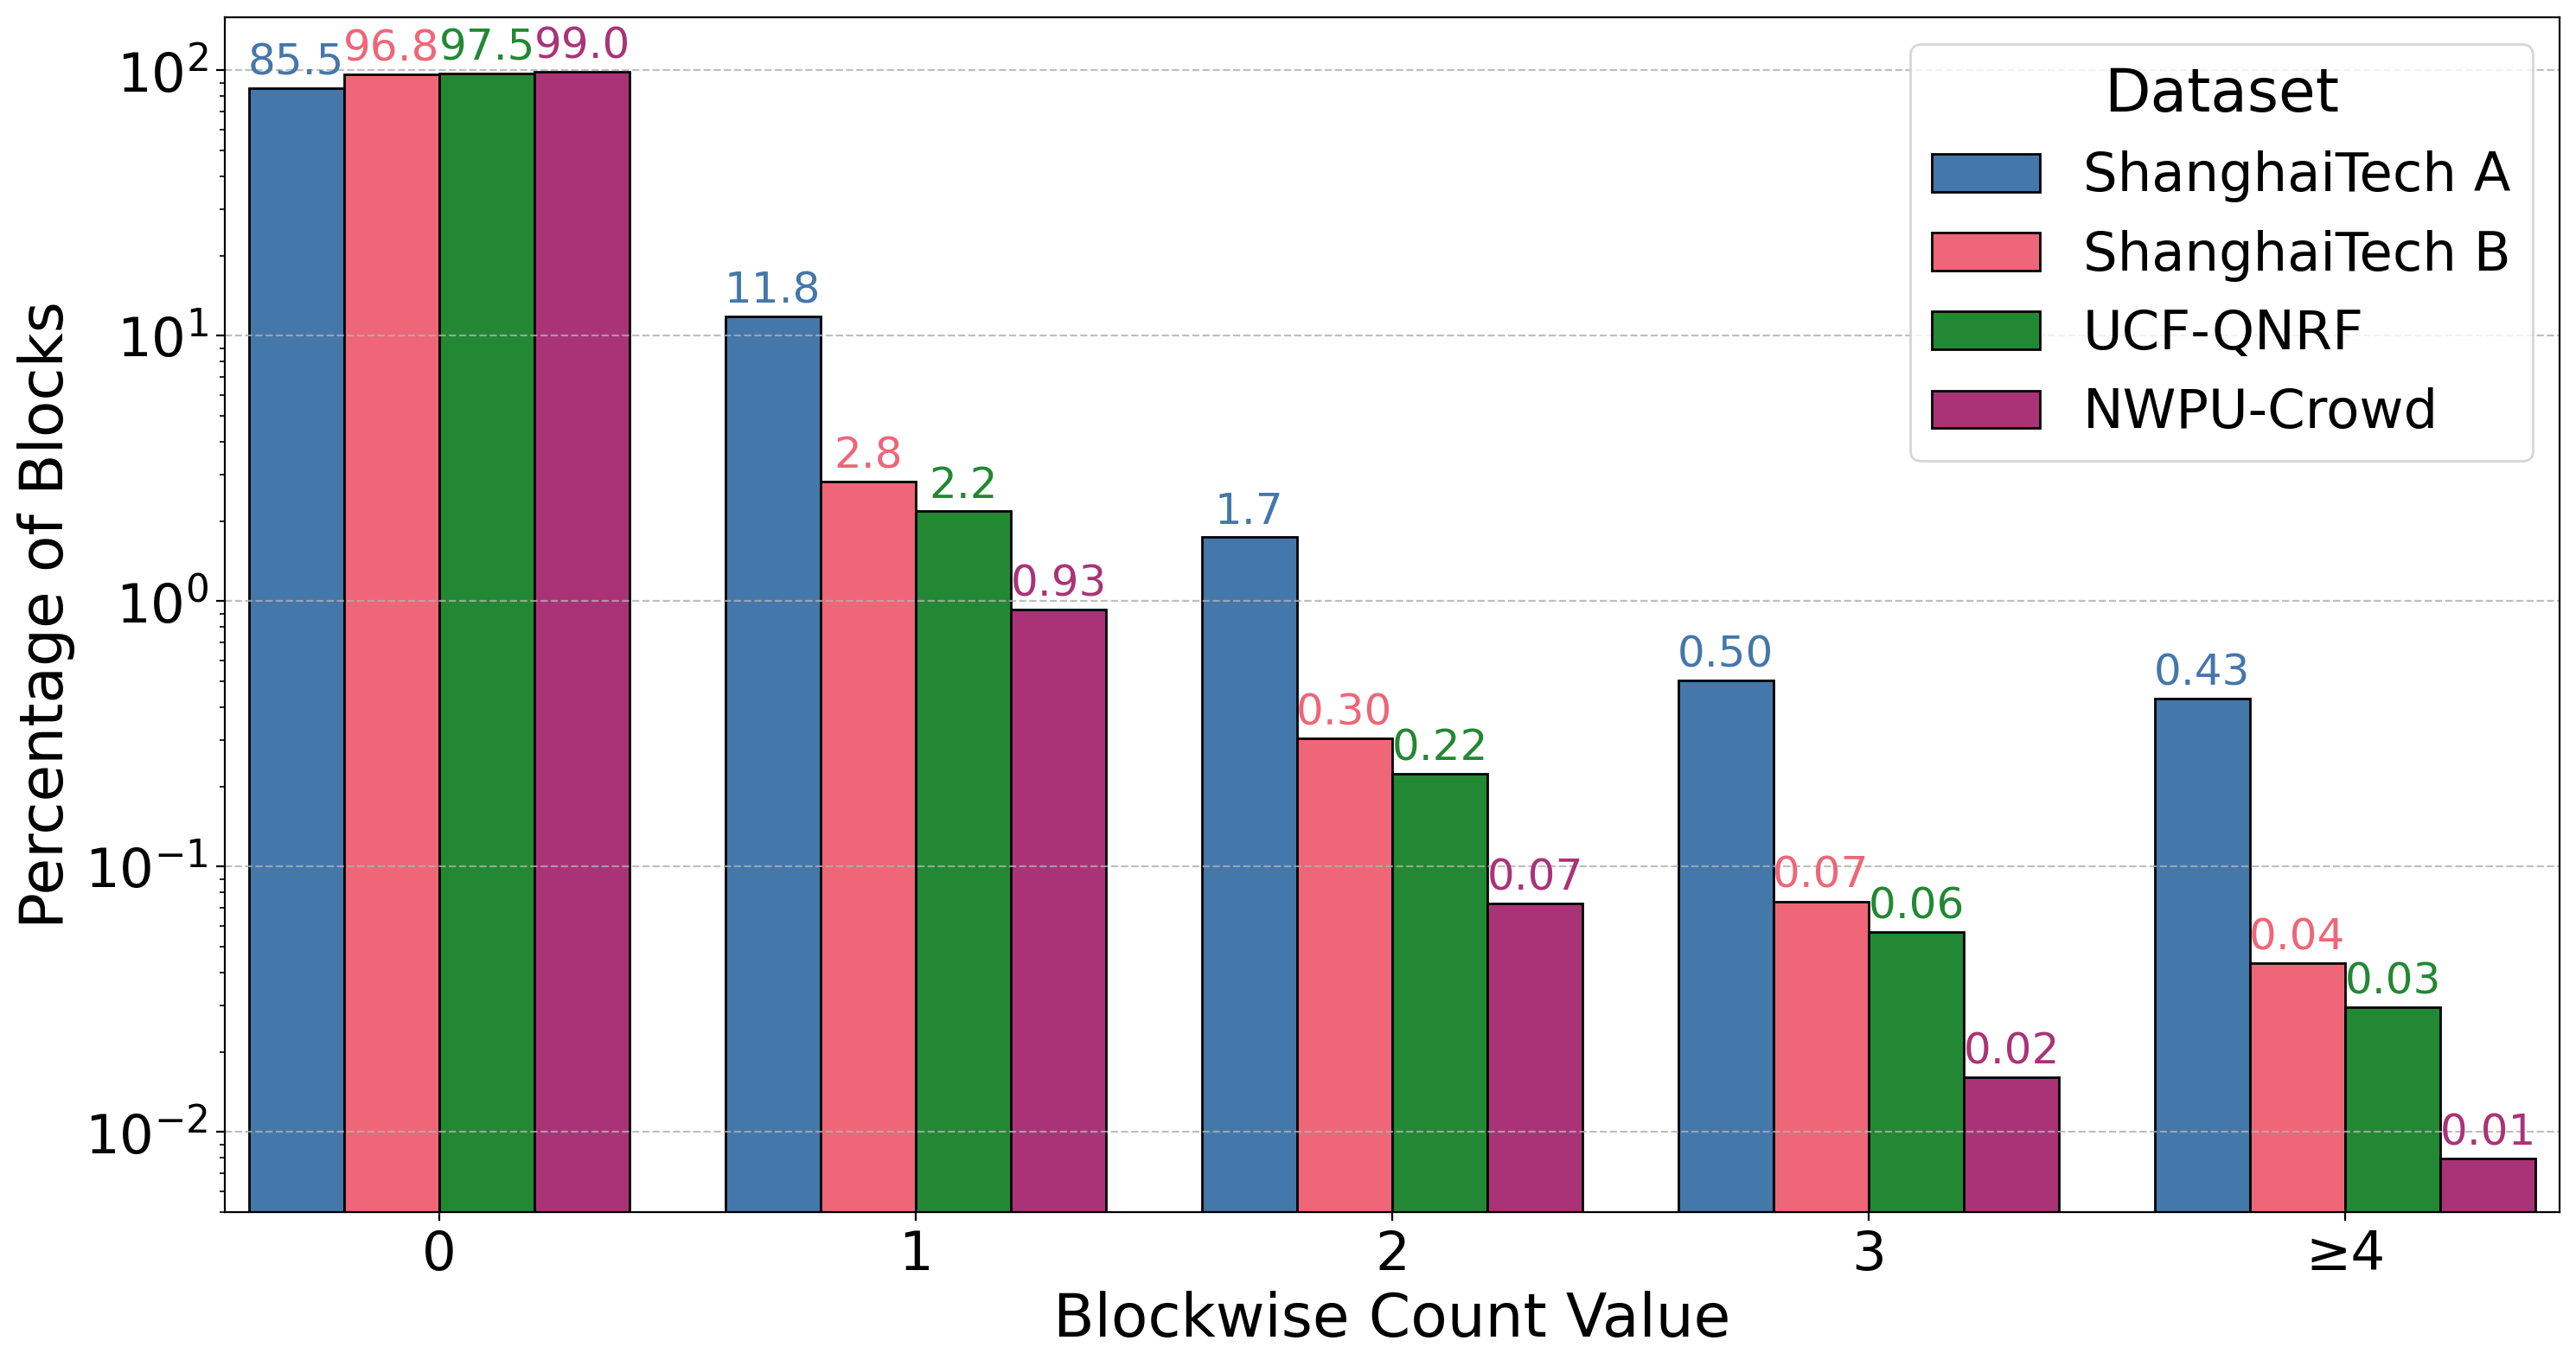

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

# copied from the counts folder
datasets = {
    "ShanghaiTech A": {
        "0": 182715307,
        "1": 25282990,
        "2": 3723241,
        "3": 1075878,
        "4": 428683,
        "5": 212379,
        "6": 116019,
        "7": 66336,
        "8": 38808,
        "9": 22851,
        "10": 13845,
        "11": 8410,
        "12": 5248,
        "13": 3355,
        "14": 1997,
        "15": 1309,
        "16": 818,
        "17": 451,
        "18": 238,
        "19": 113,
        "20": 65,
        "21": 31,
        "22": 16,
        "23": 8,
        "24": 8,
        "25": 4,
        "26": 2,
        "27": 1,
        "28": 1
    },
    "ShanghaiTech B": {
        "0": 294072360,
        "1": 8559657,
        "2": 922301,
        "3": 225017,
        "4": 75708,
        "5": 29428,
        "6": 12533,
        "7": 6347,
        "8": 3429,
        "9": 1869,
        "10": 913,
        "11": 494,
        "12": 338,
        "13": 202,
        "14": 192,
        "15": 11,
        "16": 1
    },
    "UCF-QNRF": {
        "0": 8451989906,
        "1": 189577152,
        "2": 19349594,
        "3": 4927861,
        "4": 1576908,
        "5": 556543,
        "6": 226325,
        "7": 104066,
        "8": 51679,
        "9": 24615,
        "10": 11391,
        "11": 4737,
        "12": 2041,
        "13": 921,
        "14": 450,
        "15": 236,
        "16": 120,
        "17": 54,
        "18": 20,
        "19": 4,
        "20": 2
    },
    "NWPU-Crowd": {
        "0": 28037670189,
        "1": 262823214,
        "2": 20627370,
        "3": 4559000,
        "4": 1377101,
        "5": 488567,
        "6": 205419,
        "7": 94266,
        "8": 44455,
        "9": 22605,
        "10": 11771,
        "11": 6703,
        "12": 3736,
        "13": 2433,
        "14": 1408,
        "15": 680,
        "16": 271,
        "17": 89,
        "18": 41,
        "19": 10,
        "20": 3,
        "21": 2
    }
}
data_by_value = defaultdict(dict)

colors = {
    "ShanghaiTech A": "#4477AA",
    "ShanghaiTech B": "#EE6677",
    "UCF-QNRF": "#228833",
    "NWPU-Crowd": "#AA3377"
}


for name, data in datasets.items():
    total = sum(data.values())
    counts = {k: 0 for k in range(4)}
    counts["≥4"] = 0
    for k, v in data.items():
        if int(k) < 4:
            counts[int(k)] += v
        else:
            counts["≥4"] += v
    for k in counts:
        data_by_value[k][name] = counts[k] / total * 100  # 转为百分比

# 准备绘图数据
x_labels = [0, 1, 2, 3, "≥4"]
datasets_order = list(datasets.keys())
bar_width = 0.2
x = list(range(len(x_labels)))

# 创建图形
fig, ax = plt.subplots(1, 1, figsize=(15, 8), dpi=200)

# 绘图
for i, dataset in enumerate(datasets_order):
    y_vals = [data_by_value[label][dataset] for label in x_labels]
    x_positions = [val + i * bar_width for val in x]
    bars = ax.bar(x_positions, y_vals, width=bar_width, label=dataset, edgecolor='black', color=colors[dataset])
    
    for bar in bars:
        height = bar.get_height()
        text = f'{height:.1f}' if height > 1.0 else f'{height:.2f}'
        ax.annotate(
            text,
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 2),
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontsize=18,
            weight="medium",
            color=colors[dataset],
        )

# 设置坐标轴、标题等
ax.set_xlabel('Blockwise Count Value', fontsize=25)
ax.set_ylabel('Percentage of Blocks', fontsize=25)
ax.set_yscale('log')

x = list(range(len(x_labels)))  # [0, 1, 2, 3, 4]
x_positions = [x_val + i * bar_width for x_val in x]
# 设置紧凑型横轴
ax.set_xticks([r + bar_width * 1.5 for r in x])   # 保持标签居中
ax.set_xticklabels(x_labels)

# 缩小左右空隙
left_margin = x[0] - bar_width * 0.75             # 起始位置
right_margin = x[-1] + bar_width * (len(datasets_order) - 0.25)  # 结束位置
ax.set_xlim(left_margin, right_margin)

# ax.set_xticks([r + bar_width * 1.5 for r in x])
# ax.set_xticklabels(x_labels)

ax.tick_params(axis="both", which="major", labelsize=22.5)
ax.tick_params(axis="both", which="minor", labelsize=22.5)

ax.legend(title='Dataset', title_fontsize=25, fontsize=22.5)
ax.grid(axis='y', linestyle='--', alpha=0.8)

plt.tight_layout()
plt.savefig("count_distribution.png", dpi=300, bbox_inches='tight', pad_inches=0.0)
plt.show()